1) Download the data from the file data source and provide possible data insights.

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(8,4)

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"C:\Users\jm88\Music\New folder\DataScience\Adapt Ready\complaints.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",ME,04005,NaN,Consent not provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8206605
1,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33311,NaN,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,NaN,8211390
2,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,175XX,NaN,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,NaN,8211362
3,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79907,NaN,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8210433
4,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I have observed several deviations from mandat...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10075,NaN,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8209430


In [7]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        734684
Consumer complaint narrative    3329405
Company public response         2677245
Company                               0
State                             45517
ZIP code                          30225
Tags                            4653480
Consumer consent provided?      1024493
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4366651
Complaint ID                          0
dtype: int64

In [49]:
df.shape

(5134967, 18)

# EDA & Visualazation

In [9]:
df["Sub-product"].fillna('Others', inplace = True) 
df["Sub-issue"].fillna('Others', inplace = True) 
df["Issue"].fillna('Others', inplace = True) 
df["State"].fillna('Others', inplace = True) 
df["Consumer complaint narrative"].fillna('None', inplace = True) 
df["Company public response"].fillna('None', inplace = True) 
df["Consumer consent provided?"].fillna('None', inplace = True) 
df["Company response to consumer"].fillna('None', inplace = True) 
df["Consumer disputed?"].fillna('None', inplace = True)
#df['Sub-issue'].unique()

In [10]:
df['Tags'].unique()

array([nan, 'Older American, Servicemember', 'Servicemember',
       'Older American'], dtype=object)

In [11]:
df["Tags"].fillna('Others', inplace = True) 

In [12]:
df["Tags"].unique()

array(['Others', 'Older American, Servicemember', 'Servicemember',
       'Older American'], dtype=object)

In [13]:
df['Tags'].replace("Older American, Servicemember","Older American & Servicemember", inplace = True)

In [14]:
df["Tags"].unique()

array(['Others', 'Older American & Servicemember', 'Servicemember',
       'Older American'], dtype=object)

In [15]:
df1=df.drop(['ZIP code'],axis=1)

In [16]:
df1.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64

# Data Insights

# Tags

In [17]:
df1["Tags"].value_counts()

Others                            4653480
Servicemember                      283442
Older American                     158828
Older American & Servicemember      39217
Name: Tags, dtype: int64

Text(0, 0.5, '')

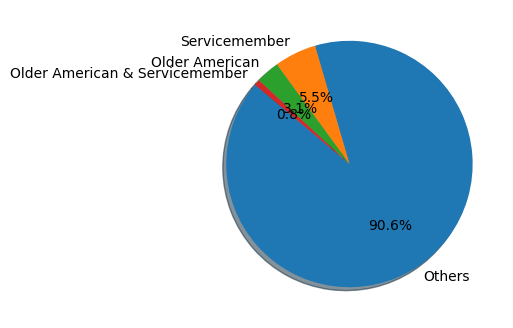

In [18]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Tags"].value_counts())[:10]
lab = "Others", "Servicemember","Older American", "Older American & Servicemember"
explode = (0,0,0,0)  
#create bar chart of top 10 teams
Responce.plot(kind='pie', explode=explode , labels = lab,autopct='%1.1f%%', shadow=True, startangle=140)
plt.ylabel("")

> Analyse compliants using "Tags". 
1) Service member is 5.5%.
2) Older American is 3.1%.
3) Older American & Servicemember is only 0.8%
4) Other is 90.6%. So most of the compliants from other Tags.

# Submitted via

In [19]:
df1["Submitted via"].value_counts()

Web             4584816
Referral         248139
Phone            180150
Postal mail       94538
Fax               25658
Web Referral       1241
Email               425
Name: Submitted via, dtype: int64

<Axes: >

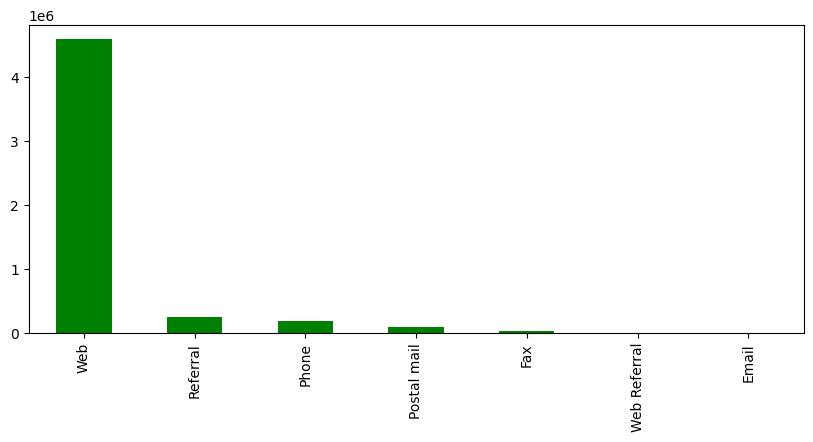

In [20]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

top_10_teams = (df1["Submitted via"].value_counts())

#create bar chart of top 10 teams
top_10_teams.plot(kind='bar',color = "green")

> Analyse compliants using "Submitted Via". 
* Most of the compliants Submitted Via "Web". Web submitted counts "4584816".

# Sub-product

In [21]:
df1["Sub-product"].value_counts()

Credit reporting                              3069348
Others                                         235292
Checking account                               227762
General-purpose credit card or charge card     197036
I do not know                                  133125
                                               ...   
Transit card                                       37
Earned wage access                                 36
Student loan debt relief                           21
Electronic Benefit Transfer / EBT card             12
Tax refund anticipation loan or check               8
Name: Sub-product, Length: 87, dtype: int64

<Axes: >

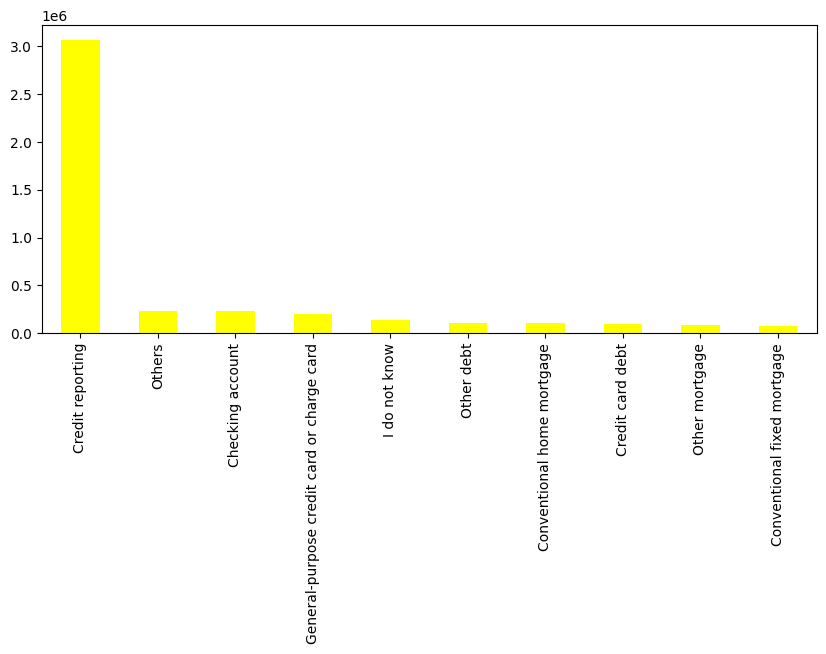

In [22]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

top_10_teams = (df1["Sub-product"].value_counts())[:10]

#create bar chart of top 10 teams
top_10_teams.plot(kind='bar',color = "yellow")

In [23]:
Total=df1["Sub-product"].count()
value = (3069348/Total)*100
value

59.773470793483185

> Analyse compliants using "Sub-Product". 
* Most of the compliants about "Credit reporting". Credit reporting compliants counts "3069348".
* Credit reporting compliant is almost 60% in Sub-Product.

# Product

In [39]:
df1["Product"].unique()
df1["Product"].value_counts()[:10]

Credit reporting, credit repair services, or other personal consumer reports    2163878
Credit reporting or other personal consumer reports                              931699
Debt collection                                                                  564942
Mortgage                                                                         397485
Checking or savings account                                                      211779
Credit card or prepaid card                                                      206373
Credit reporting                                                                 140429
Credit card                                                                      131953
Student loan                                                                      87898
Bank account or service                                                           86205
Name: Product, dtype: int64

Text(0, 0.5, '')

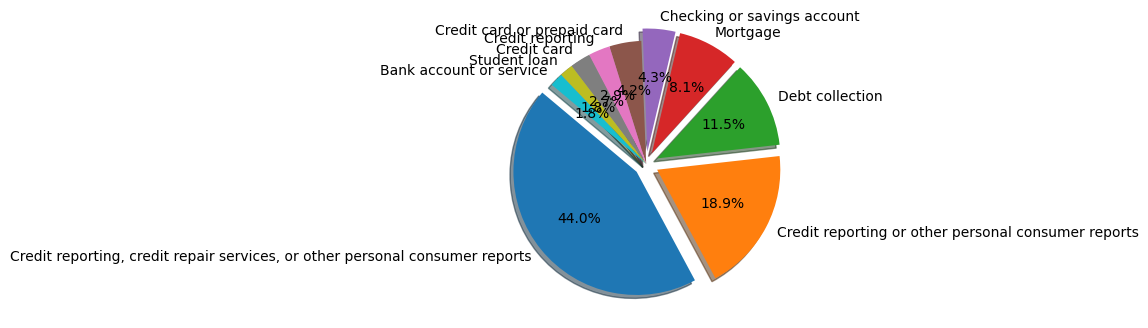

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Product"].value_counts())[:10]
lab = "Credit reporting, credit repair services, or other personal consumer reports","Credit reporting or other personal consumer reports","Debt collection","Mortgage","Checking or savings account","Credit card or prepaid card","Credit reporting","Credit card","Student loan","Bank account or service"
explode = (0.1, 0.1, 0.1, 0.1, 0.1,0,0,0,0,0)  
#create bar chart of top 10 teams
Responce.plot(kind='pie', explode=explode , labels = lab,autopct='%1.1f%%', shadow=True, startangle=140)
plt.ylabel("")

> Analyse compliants using "Product". 
* Most of the compliants about "Credit reporting, credit repair services, or other personal consumer reports".
* "Credit reporting and Debt collection" are most of the compliants Products.

# State

In [23]:
df1["State"].value_counts()

FL    614893
CA    586768
TX    546373
GA    351669
NY    329708
       ...  
AA        59
MP        56
AS        47
MH        33
PW        13
Name: State, Length: 64, dtype: int64

<Axes: >

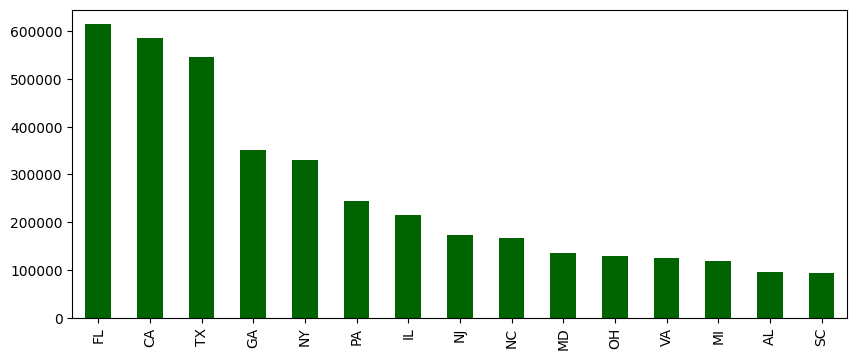

In [24]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

State = (df1["State"].value_counts())[:15]

#create bar chart of top 10 teams
State.plot(kind='bar',color = "darkgreen")

> Analyse compliants using "States". 
* Most of the compliants raised from FL, CA, TX, GA, NY, PA, IL States.

# Issue

In [41]:
df1["Issue"].value_counts()

Incorrect information on your report                                                1492050
Improper use of your report                                                          790888
Problem with a credit reporting company's investigation into an existing problem     589336
Attempts to collect debt not owed                                                    210783
Problem with a company's investigation into an existing problem                      198504
                                                                                     ...   
Lender sold the property                                                                  7
Property was damaged or destroyed property                                                7
Lender damaged or destroyed property                                                      3
Lost or stolen refund                                                                     2
Others                                                                          

In [42]:
Total=df1["Issue"].count()

In [43]:
#-> Total persentage of "Incorrect information on your report"
value = (1492050/Total)*100

In [44]:
value

29.056661902598403

> Analyse compliants using "Issue". 
* Incorrect information on your report is 29% in Total Issues.
# Top 5 issues
1) Incorrect information on your report                                                
2) Improper use of your report                                                          
3) Problem with a credit reporting company's investigation into an existing problem     
4) Attempts to collect debt not owed                                                   
5) Problem with a company's investigation into an existing problem

In [29]:
df1["Sub-issue"].value_counts()

Information belongs to someone else                                                 988837
Others                                                                              734684
Reporting company used your report improperly                                       517881
Their investigation did not fix an error on your report                             452281
Credit inquiries on your report that you don't recognize                            268236
                                                                                     ...  
Problem with a credit reporting company's investigation into an existing problem         5
Issues with financial aid services                                                       4
Credit monitoring or identity theft protection services                                  1
Problem with fraud alerts or security freezes                                            1
Improper use of your report                                                              1

# Timely response?

In [30]:
df1["Timely response?"].value_counts()

Yes    5076581
No       58386
Name: Timely response?, dtype: int64

([<matplotlib.patches.Wedge at 0x27f56f5d510>,
 [Text(-1.0992982859093792, 0.03928458472099473, 'Yes'),
  Text(1.0992982830358697, -0.039284665130162134, 'No')],
 [Text(-0.5996172468596613, 0.02142795530236076, '98.9%\n(5076581)'),
  Text(0.5996172452922925, -0.021427999161906616, '1.1%\n(58386)')])

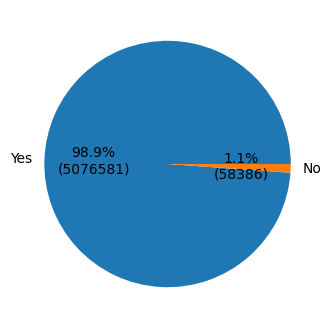

In [31]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df1['Timely response?'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

> Analyse compliants using "Timely Response?".
* 98.9 % percentage responsed immediatly.

# Consumer disputed?

In [32]:
df1["Consumer disputed?"].value_counts()

None    4366651
No       619938
Yes      148378
Name: Consumer disputed?, dtype: int64

<Axes: >

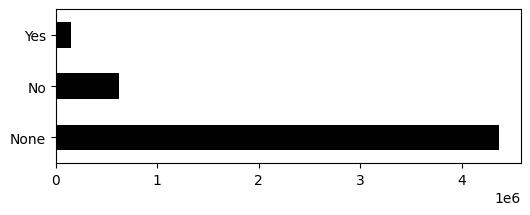

In [33]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6,2)

disputed = (df1["Consumer disputed?"].value_counts())

#create bar chart of top 10 teams
disputed.plot(kind='barh',color = "black")

# Company public responce?

In [34]:
df1["Company public response"].value_counts()

None                                                                                                                       2677245
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            2209207
Company believes it acted appropriately as authorized by contract or law                                                    143822
Company chooses not to provide a public response                                                                             52473
Company believes the complaint is the result of a misunderstanding                                                           13177
Company disputes the facts presented in the complaint                                                                        11216
Company believes complaint caused principally by actions of third party outside the control or direction of the company       7844
Company believes complaint is the result of an isolated error                      

<Axes: >

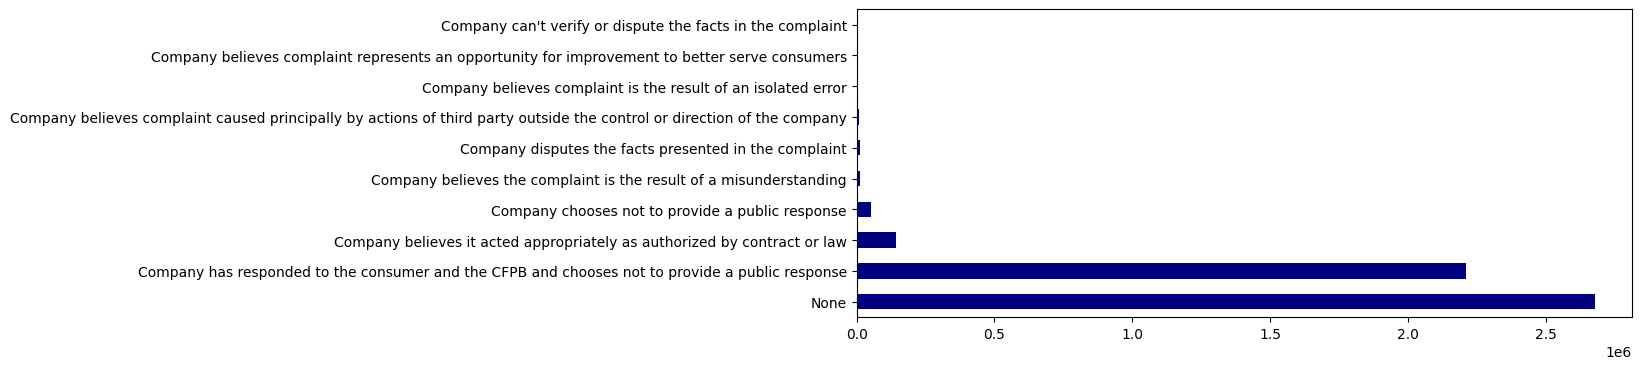

In [35]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Company public response"].value_counts())[:10]

#create bar chart of top 10 teams
Responce.plot(kind='barh',color = "navy")

> Analyse compliants using "Company Public Response?".
* "Company has responded to the consumer and the CFPB and chooses not to provide a public response" is a most of the public responce about company.

# Company

In [36]:
df1["Company"].value_counts()

EQUIFAX, INC.                                     1063780
TRANSUNION INTERMEDIATE HOLDINGS, INC.             985391
Experian Information Solutions Inc.                897985
BANK OF AMERICA, NATIONAL ASSOCIATION              140149
WELLS FARGO & COMPANY                              128246
                                                   ...   
AutoStar Finance, Inc - D/B/A Atlanta AutoStar          1
National Litigation Law Group, LLP                      1
Law Offices of Thomas B. Peterman, P.A.                 1
PACIFIC FORESIGHT FINANCIAL CORPORATION                 1
FHC Mortgage                                            1
Name: Company, Length: 7200, dtype: int64

<Axes: >

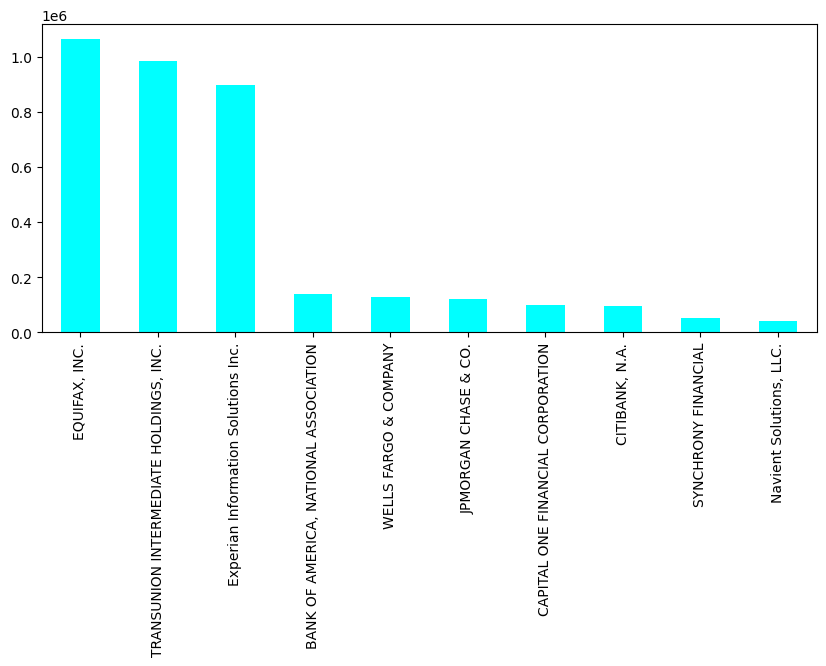

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Company"].value_counts())[:10]

#create bar chart of top 10 teams
Responce.plot(kind='bar',color = "cyan")

> Analyse compliants using "Company".
# Top 5 Company get most compliants.
1) EQUIFAX, INC.                                     
2) TRANSUNION INTERMEDIATE HOLDINGS, INC.             
3) Experian Information Solutions Inc.                
4) BANK OF AMERICA, NATIONAL ASSOCIATION              
5) WELLS FARGO & COMPANY

# Date sent to company

In [61]:
df["Date sent to company"].value_counts()

2024-04-02    7657
2024-03-07    7588
2024-04-11    7532
2024-03-21    7485
2024-03-05    7443
              ... 
2012-02-19       1
2012-03-18       1
2012-11-11       1
2012-01-16       1
2012-02-11       1
Name: Date sent to company, Length: 4482, dtype: int64

<Axes: >

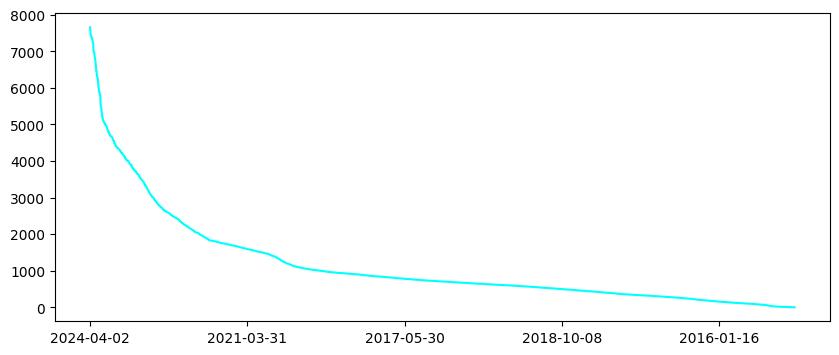

In [65]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Date sent to company"].value_counts())

#create bar chart of top 10 teams
Responce.plot(kind='line',color = "cyan")

> Analyse compliants using "Date sent to company".
* Between 30-05-2017 to 02-04-2024 most of the compliants sent to the companies.

# Consumer consent provided?

In [66]:
df1["Consumer consent provided?"].value_counts()

Consent not provided    2046457
Consent provided        1807111
None                    1024493
Other                    248001
Consent withdrawn          8905
Name: Consumer consent provided?, dtype: int64

Text(0, 0.5, '')

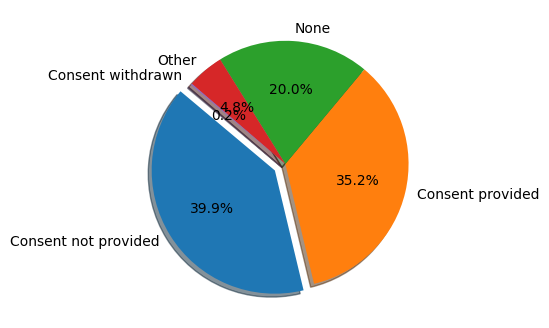

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Consumer consent provided?"].value_counts())[:10]
lab = "Consent not provided", "Consent provided", "None","Other", "Consent withdrawn" 
explode = (0.1, 0, 0, 0, 0)  
#create bar chart of top 10 teams
Responce.plot(kind='pie', explode=explode , labels = lab,autopct='%1.1f%%', shadow=True, startangle=140)
plt.ylabel("")

# Company response to consumer

In [47]:
df1["Company response to consumer"].value_counts()

Closed with explanation            3432407
Closed with non-monetary relief    1282308
In progress                         215027
Closed with monetary relief         153016
Closed without relief                17868
Closed                               17611
Untimely response                    11412
Closed with relief                    5304
None                                    14
Name: Company response to consumer, dtype: int64

<Axes: >

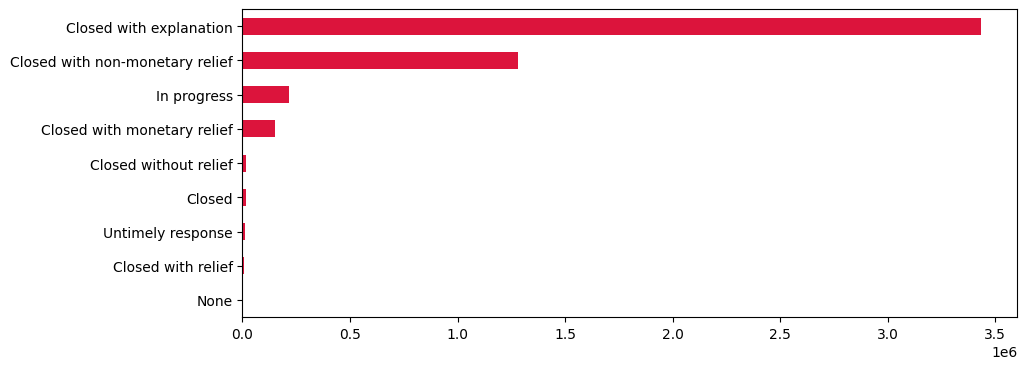

In [41]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,4)

Responce = (df1["Company response to consumer"].value_counts())
Responce= Responce.sort_values(ascending=True)

Responce.plot(kind='barh',y= Responce, color = "crimson" )

In [48]:
Total=df1["Company response to consumer"].count()
value = (3432407/Total)*100
value

66.84379860669017

> Analyse compliants using "Company response to consumer".
# 66.8 % Companies are Closed the compliants with explanation.

================================================================================

In [52]:
df2=df1.sample(n=1048576)
df2.to_csv("complaints_EDA.csv")

2. Given an unsorted array of integers, find the length of the longest continuous
increasing subsequence (subarray).

In [54]:
def find_len_sub(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length

# get the input
input1 = list(map(int,input().split())) #[1, 3, 5, 4, 7],[2, 2, 2, 2, 2]

print("Output:", find_len_sub(input1))

 2 2 2 2 2


Output:  1


=================================================================================

3. Given a list of non negative integers, arrange them such that they form the largest
number.

In [57]:
from functools import cmp_to_key

def largest_number(nums):
    def compare(a, b):
        # Concatenate and compare as strings
        return int(b + a) - int(a + b)
    # Convert integers to strings
    nums_str = [str(num) for num in nums]
    nums_str.sort(key=cmp_to_key(compare))  
    # Handle case when the input list contains only zeros
    if nums_str[0] == '0':
        return '0'
    return ''.join(nums_str)

# Get the input
input1 = list(map(int,input().split())) #[10,2], [3, 30, 34, 5, 9]

print("Output:", largest_number(input1))

 3 30 34 5 9


Output: 9534330


=================================================================================

4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached
sample_json.json file using Python.

In [58]:
import json
import csv

with open(r"C:\Users\jm88\Music\New folder\DataScience\Adapt Ready\DT A1 sample_json.json", 'r') as json_file:
    data = json.load(json_file)

# get "servlet-name" and "servlet-class" from each entry
servlet_data = []
for servlet in data['web-app']['servlet']:
    servlet_name = servlet['servlet-name']
    servlet_class = servlet['servlet-class']
    servlet_data.append((servlet_name, servlet_class))

with open('servlet_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(['servlet-name', 'servlet-class'])
    # Write the data
    writer.writerows(servlet_data)

print("CSV file created successfully.")


CSV file created successfully.
